<center>
<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="360" height="120" />
</center>


# Word relationships using word2vec




<center><img src = "https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/121.jpg" height = "280"/></center>

## Table of Contents
1. [Data Preprocessing](#Section1)<br>
   - 1.1[Importing all the frameworks and libraries](#Section101)<br>
2.[Building Word2Vec model](#Section2)<br>
3.[Visualizing the results](#Section3)<br>
4.[Plotting the model](#Section4)<br>

## Relationships

![](https://cdn-images-1.medium.com/max/2400/1*2r1yj0zPAuaSGZeQfG6Wtw.png)

## Importing all the frameworks and libraries

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import re
import nltk
import warnings
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('stopwords')
warnings.filterwarnings(action = 'ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##  Loading the datatset.
<center><img src = " https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/wine.JPG"/></center>

In [0]:
wine_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/DeepLearning/master/Data/Winemag_150k.csv')

In [3]:
wine_data.head()

,id,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Lets  import Porter Stemmer to stem the words (remove the endings to group together words with the same root form).


In [0]:
stemmer = PorterStemmer()

<center><img src = " https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/stemming.jpg" height = "200"/></center>

## Data Cleaning
<center><img src = "https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/cap2.JPG" height = "200"/></center>

<center>
<img src = "https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/k.jpg"/>
</center>

In [0]:
# function to clean text
def review_to_words(raw_review):
  
    # 1. Remove non-letters       
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    
   # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    
    
    # 3. Remove Stopwords. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english")) 
    
    
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stops] #returns a list 
    
    
    # 5. Stem words. Need to define porter stemmer above
    singles = [stemmer.stem(word) for word in meaningful_words]
    
    # 6. Join the words back into one string separated by space , and return the result.
    return( " ".join( singles )) 

In [0]:
# applying it to our text data 
# dataset is named wine_data and the text are in the column "description"
processed_wmn = [review_to_words(text) for text in wine_data.description]
#This will take sometime.

In [7]:
processed_wmn[0:5]

['tremend variet wine hail oakvil age three year oak juici red cherri fruit compel hint caramel greet palat frame eleg fine tannin subtl minti tone background balanc reward start finish year ahead develop nuanc enjoy',
 'ripe aroma fig blackberri cassi soften sweeten slather oaki chocol vanilla full layer intens cushion palat rich flavor chocolati black fruit bake spice toasti everlast finish headi ideal balanc drink',
 'mac watson honor memori wine made mother tremend delici balanc complex botrytis white dark gold color layer toast hazelnut pear compot orang peel flavor revel succul g l residu sugar',
 'spent month new french oak incorpor fruit ponzi aurora abetina madrona vineyard among other aromat dens toasti deftli blend aroma flavor toast cigar box blackberri black cherri coffe graphit tannin polish fine sheen frame finish load dark chocol espresso drink',
 'top wine la b gude name highest point vineyard feet structur densiti consider acid still calm month wood wine develop extra

- There's one more **pre-processing step** to do before passing our data to the **word2vec model**. 
-  Specifically, the **library** we will use for the analysis requires the **text data** to be stored in a **list of lists**.
- In other words, we will have **one giant list** which contains **all the texts**. 
- Within this giant list, each **individual text** will be represented in a (sub) list, which contains the **words** for that **text.**

## Let's define a function to build this list of lists, and apply it to our processed Winemaker's Notes: 


In [0]:
# Building a corpus for the word2vec model.
def build_corpus(data):
  
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data:
        word_list = sentence.split(" ")
        corpus.append(word_list)    
           
    return corpus

corpus = build_corpus(processed_wmn) 

### We can examine our first text in this list of lists with the call corpus[0]:


In [9]:
corpus[0]

['tremend',
 'variet',
 'wine',
 'hail',
 'oakvil',
 'age',
 'three',
 'year',
 'oak',
 'juici',
 'red',
 'cherri',
 'fruit',
 'compel',
 'hint',
 'caramel',
 'greet',
 'palat',
 'frame',
 'eleg',
 'fine',
 'tannin',
 'subtl',
 'minti',
 'tone',
 'background',
 'balanc',
 'reward',
 'start',
 'finish',
 'year',
 'ahead',
 'develop',
 'nuanc',
 'enjoy']

## Building the Word2vec Model
- We will now build the **word2vec model** with the **gensim library**.
- we will specify the following **hyperparameters** (descriptions taken directly from the gensim documentation):
  - **size**: dimensionality of the feature vectors
  - **window**: maximum distance between the current and predicted word within a sentence
  - **min_count**: ignore all words with total frequency lower than this
  - **workers**: use this many worker threads to train the model (=faster training with multicore machines)


<center> <img src = " https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/yut.JPG"/>
</center>

### We import the libraries, and run the model with the specifications described above with the following code:

In [10]:
!pip install gensim

In [11]:
from gensim.models import word2vec
# run the model
model = word2vec.Word2Vec(corpus, size=100, window=5, min_count=1000, workers = 4)
model

### We can see how many words were used in our model vocabulary with the command:  len(model.wv.vocab).

In [12]:
len(model.wv.vocab)

592

### We can examine the first 5 elements of model vocabulary with the following command:


In [13]:
[x for x in model.wv.vocab][0:5]

['variet', 'wine', 'age', 'three', 'year']

![Imgur](https://i.imgur.com/HLC6CLe.jpg)

## Visualizing the Results

- In order to **visualize the results** of the model, we will make use of the **100 hidden weights** for each word in our **model vocabulary**. 
- This information can be contained in a **matrix** which has **592 rows**(one for each word in our vocabulary) and **100 columns** (representing the weights for each word for the 100 neurons we specified in our word2vec model ).
- We can use a **dimension reduction technique** (akin to the PCA analysis we saw in the previous post) to reduce the 100 columns of weights to 2 underlying dimensions.
- Then plot the **592 words** in a **bi-plot** defined by these 2 dimensions.
- Rather than using **PCA**,  we will use **t-SNE.**
- **T - SNE** is a **dimension reduction technique** that works well for the visualization of high-dimensional datasets.

<center><img src = " https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/bhb.JPG"/>
</center>

- Though **PCA is great**, it does have some **severe drawbacks**. 
- One drawback of PCA is that it is a **linear projection**, meaning it **can’t capture non-linear** dependencies. 
- For instance, PCA would not be able to “**unroll**” the following structure.

<center><img src = "https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/kper.png"/></center>

- This is because a **linear projection** is basically like **casting a shadow**. 
- There is **no direction** from which we can look at this **swiss roll** that would allow us to open it up.
- This is the motivation behind **t-SNE**. 
- Unlike **PCA**, **t-SNE** is **not limited** to **linear projections**, which makes it suited to all **sorts of datasets.**

<center><img src = " https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/swiss_roll_manifold_sculpting.png" height = "200"/></center>

## Difference between t-SNE and PCA

<center><img src = " https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/pca_tsne.png" height = "500"/></center>

<center>
<img src = "https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/capture1.JPG"
     width = 360  />
</center>

### Lets  import the t-SNE library and matplotlib for plotting

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

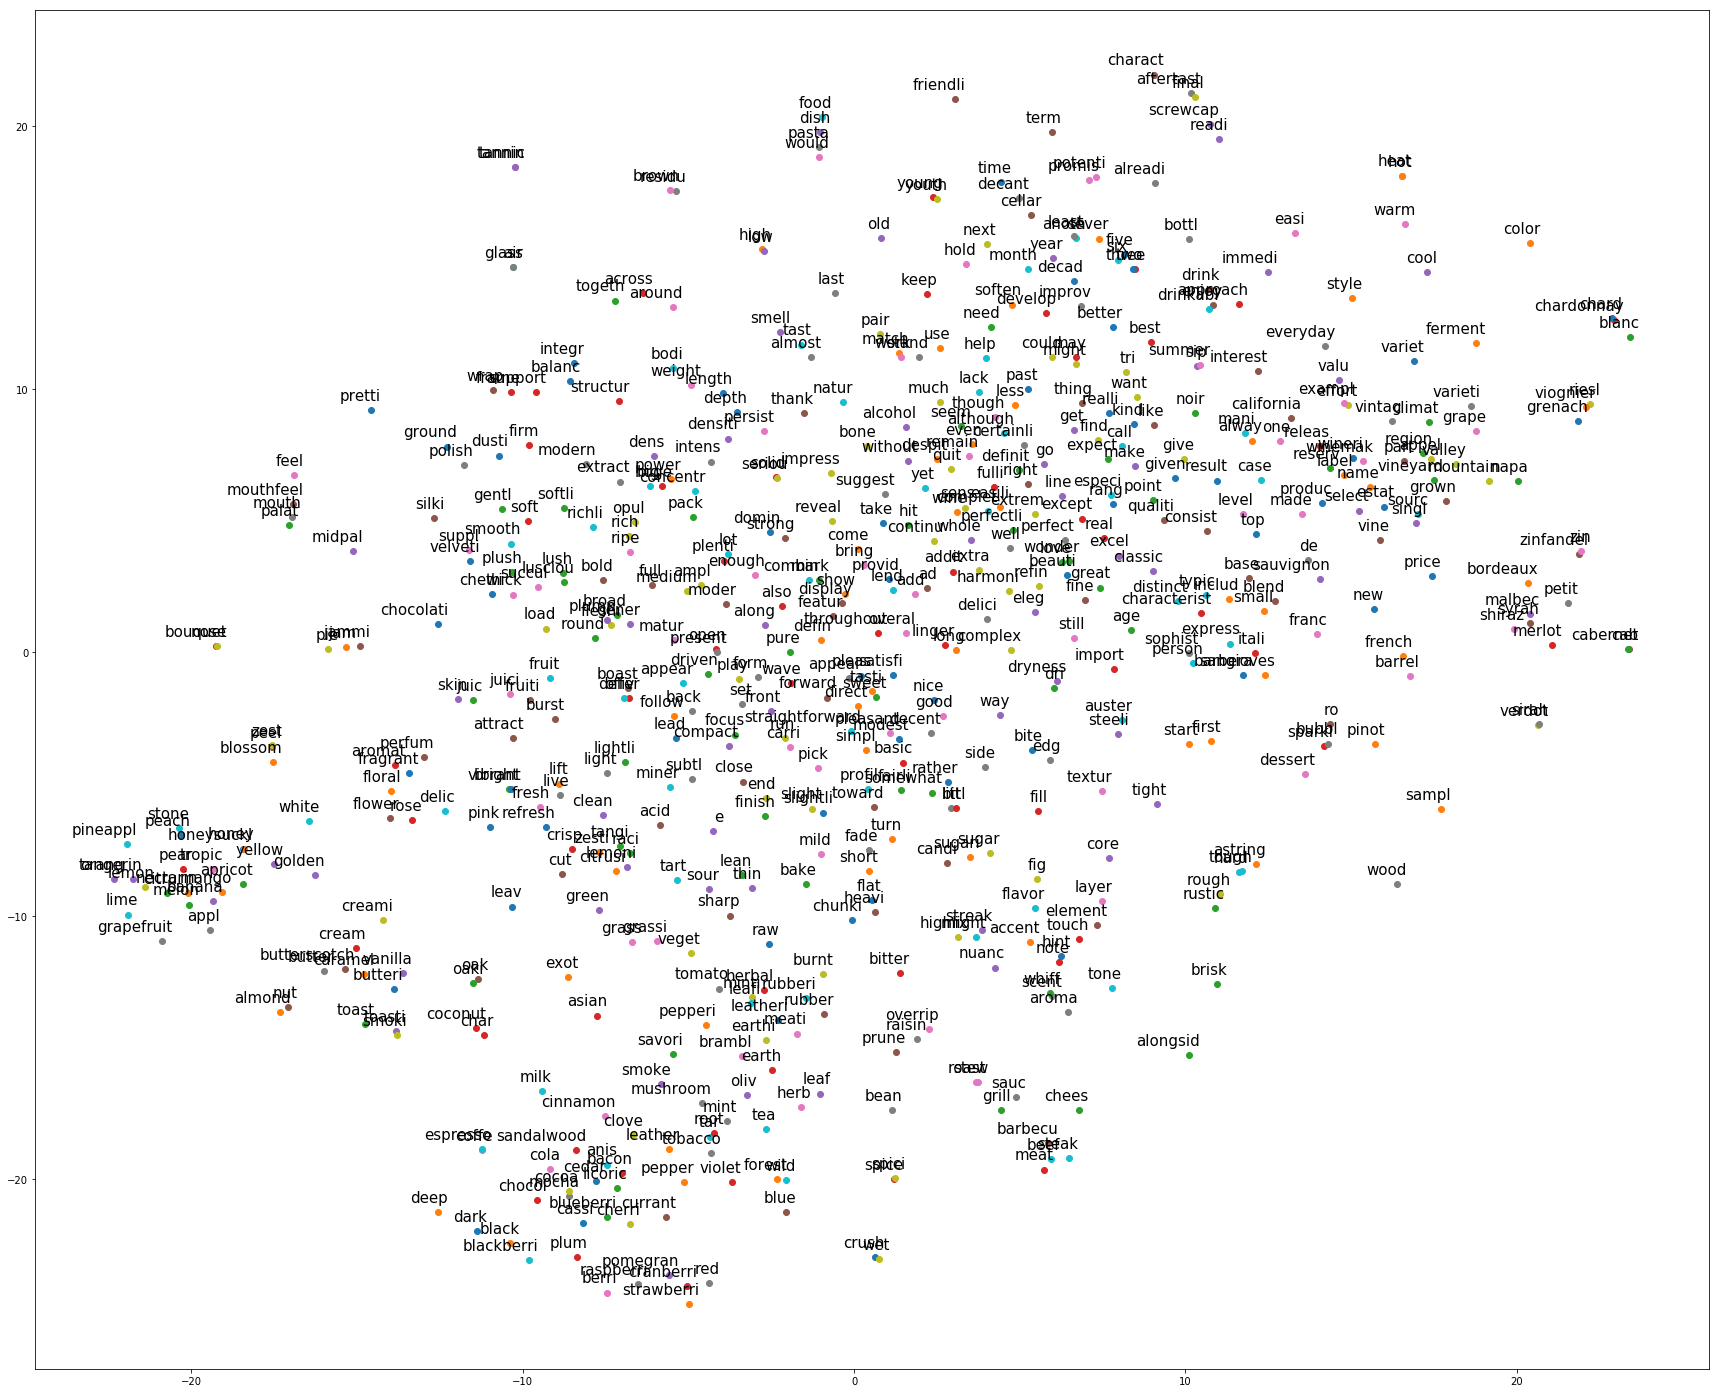

In [15]:
# define the function to compute the dimensionality reduction
# and then produce the biplot
def tsne_plot(model):
    "Creates a TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(30,25)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(10, 7),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',size = 15)
    plt.show()
    
# call the function on our dataset
tsne_plot(model)

 <center>
<img src = "https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/timeforwine.JPG" height = "300" width = "500"/></center>